# The `Stinkbug` dataset

# Loading the data

In [26]:
import pandas as pd
df = pd.read_csv("./datasets/cimice/captures-raw.csv", sep=',')
df

,GID,TIMESTAMP,CROP_ID,ADULTS,SMALL_INSTARS,LARGE_INSTARS,TEMPERATURE_AVG,TEMPERATURE_MAX,TEMPERATURE_MIN,HUMIDITY_AVG,HUMIDITY_MAX,HUMIDITY_MIN,PRECIPITATIONS,WINDSPEED_AVG,WINDSPEED_MAX,TOTAL_CAPTURES
0,149,2020-04-27,41,0.0,0.0,0.0,16.966669,22.683333,10.550002,63.500000,84.833333,41.500000,2.199999,1.500000,3.200000,0.0
1,144,2020-04-27,31,0.0,0.0,0.0,15.785717,22.885719,8.042862,64.571429,90.142857,39.000000,4.000001,1.657143,3.157143,0.0
2,215,2020-04-27,47,5.0,0.0,0.0,17.037496,22.787504,11.149999,53.000000,72.375000,36.250000,2.599999,2.625000,4.737500,5.0
3,222,2020-04-27,19,1.0,0.0,0.0,16.942861,23.457143,9.414279,59.857143,90.571429,38.142857,3.299999,2.857143,5.471429,1.0
4,217,2020-04-27,19,9.0,0.0,0.0,17.028571,22.885710,10.371432,58.428571,84.428571,39.571429,5.000000,2.657143,5.000000,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10944,810,2022-10-17,19,10.0,0.0,0.0,17.687498,24.512502,12.149995,76.125000,NaN,NaN,0.200000,NaN,NaN,10.0
10945,845,2022-10-17,39,26.0,0.0,0.0,18.025003,23.975000,13.274995,76.500000,NaN,NaN,0.000000,NaN,NaN,26.0
10946,888,2022-10-17,11,1.0,0.0,0.0,16.900003,23.875002,10.900003,77.500000,NaN,NaN,0.400000,NaN,NaN,1.0
10947,885,2022-10-17,36,16.0,0.0,0.0,17.599991,23.614282,12.300003,76.857143,NaN,NaN,0.299999,NaN,NaN,16.0


# ... and then?

# How many of you apply **GenAI** (e.g., LLMs such as ChatGPT) to data science?

# (Dis)Agree? [@DBLP:journals/cacm/Welsh23]

“Programming will be obsolete. I believe the conventional idea of ‘writing a program’ is headed for extinction, and indeed, for all but very specialized applications, most software, as we know it, will be replaced by AI systems that are trained rather than programmed. In situations where one needs a ‘simple’ program (after all, not everything should require a model of hundreds of billions of parameters running on a cluster of GPUs), those programs will, themselves, be generated by an AI rather than coded by hand.”

# [@DBLP:journals/cacm/WaldoB25]

Despite their powerful capabilities, however, generative pre-trained transformers (GPTs) have the tendency to “hallucinate” responses. A hallucination occurs when an LLM-based GPT generates a response that is seemingly realistic yet is nonfactual, nonsensical, or inconsistent with the given prompt.

# How many of you use **AutoML** for training Machine Learning pipelines?

# [@DBLP:journals/cacm/BieRHHSW22]

"AutoML falls squarely into the first form of automation, mechanization [...]. At the same time, it can be seen as yet another level of abstraction over a series of automation stages. First, there is the well-known use of *programming for automation*. Second, *machine learning automatically generates hypotheses and predictive models*, which typically take the form of algorithms (for example, in the case of a decision tree or a neural network); therefore, machine learning methods can be seen as *meta-algorithms that automate programming tasks*, and hence “automate automation.” And third, *automated machine learning makes use of algorithms that select and configure machine learning algorithms*—that is, of *meta-meta-algorithms that can be understood as automating the automation of automation*."

# [@DBLP:journals/cacm/BieRHHSW22]

"The impressive performance levels reached by AutoML systems are evident in the results from recent competitions.17 Notably, Auto-sklearn significantly outperformed human experts in the human track of the 2015/2016 ChaLearn AutoML Challenge."

# Do we still need data scientists?

# GenAI and AutML

This **code was written by ChatGPT 4o** and uses **AutoML to train several models** given a specific budget

In [27]:
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from flaml import AutoML

X = df.drop(columns=['ADULTS'])
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

automl = AutoML()
automl_settings = {
    "time_budget": 30,  # Time budget in seconds
    "max_iter": 30,  # Max number of iterations
    "metric": 'rmse',  # Evaluation metric
    "task": 'regression',  # Task type
}
automl.fit(X_train, y_train, **automl_settings)
y_pred = automl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE using AutoML:", round(rmse, 2))

[flaml.automl.logger: 03-28 17:15:20] {1728} INFO - task = regression


[flaml.automl.logger: 03-28 17:15:20] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 03-28 17:15:20] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 03-28 17:15:20] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 03-28 17:15:20] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-28 17:15:21] {2393} INFO - Estimated sufficient time budget=4963s. Estimated necessary time budget=35s.
[flaml.automl.logger: 03-28 17:15:21] {2442} INFO -  at 0.6s,	estimator lgbm's best error=12.0178,	best estimator lgbm's best error=12.0178
[flaml.automl.logger: 03-28 17:15:21] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-28 17:15:22] {2442} INFO -  at 1.4s,	estimator lgbm's best error=12.0178,	best estimator lgbm's best error=12.0178
[flaml.automl.logger: 03-28 17:15:22] {2258} INFO - iteration 2, current learner sgd
[flaml.automl.logger:

# Let's try simpler models

In [28]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['ADULTS'])
X['TIMESTAMP'] = pd.to_datetime(X['TIMESTAMP']).astype(int) / 10**9
X.fillna(X.mean(), inplace=True)
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
rmse_log_reg = root_mean_squared_error(y_test, y_pred_log_reg)
print("RMSE using Logistic Regression:", round(rmse_log_reg, 2))

RMSE using Logistic Regression: 0.0


# Why?

# Let's take a look at the features. Do they ring a bell?

In [29]:
df.columns

Index(['GID', 'TIMESTAMP', 'CROP_ID', 'ADULTS', 'SMALL_INSTARS',
       'LARGE_INSTARS', 'TEMPERATURE_AVG', 'TEMPERATURE_MAX',
       'TEMPERATURE_MIN', 'HUMIDITY_AVG', 'HUMIDITY_MAX', 'HUMIDITY_MIN',
       'PRECIPITATIONS', 'WINDSPEED_AVG', 'WINDSPEED_MAX', 'TOTAL_CAPTURES'],
      dtype='object')

#

`ADULTS` = - `SMALL_INSTARS` - `LARGE_INSTARS` + `TOTAL_CAPTURES`

LinearRegression correctly captures this pattern, AutoML does not

# This was a trick, usually we do not have this type of derived features in the dataset

Let's drop the `TOTAL_CAPTURE`

In [30]:
X = df.drop(columns=['ADULTS', 'TOTAL_CAPTURES'])
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
automl = AutoML()
automl_settings = {
    "time_budget": 30,  # Time budget in seconds
    "max_iter": 30,  # Max number of iterations
    "metric": 'rmse',  # Evaluation metric
    "task": 'regression',  # Task type
}
automl.fit(X_train, y_train, **automl_settings)
y_pred = automl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE using AutoML:", round(rmse, 2))

[flaml.automl.logger: 03-28 17:15:26] {1728} INFO - task = regression
[flaml.automl.logger: 03-28 17:15:26] {1739} INFO - Evaluation method: holdout


[flaml.automl.logger: 03-28 17:15:26] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 03-28 17:15:26] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 03-28 17:15:26] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-28 17:15:26] {2393} INFO - Estimated sufficient time budget=194s. Estimated necessary time budget=1s.
[flaml.automl.logger: 03-28 17:15:26] {2442} INFO -  at 0.1s,	estimator lgbm's best error=14.1248,	best estimator lgbm's best error=14.1248
[flaml.automl.logger: 03-28 17:15:26] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-28 17:15:26] {2442} INFO -  at 0.1s,	estimator lgbm's best error=14.1248,	best estimator lgbm's best error=14.1248
[flaml.automl.logger: 03-28 17:15:26] {2258} INFO - iteration 2, current learner sgd
[flaml.automl.logger: 03-28 17:15:27] {2442} INFO -  at 0.7s,	estimator sgd's best error=16.9479,	best

In [31]:
automl.best_estimator

'lgbm'

In [32]:
automl.best_config

{'n_estimators': 99,
 'num_leaves': 15,
 'min_child_samples': 3,
 'learning_rate': np.float64(0.17402065726724145),
 'log_max_bin': 8,
 'colsample_bytree': np.float64(0.6649148062238498),
 'reg_alpha': 0.0009765625,
 'reg_lambda': np.float64(0.006761362450996487)}

# Can we do better?

From the literature, we know that the spreading of bugs depends on:

1. Time. How?
2. Cumulative degree days: $\sum_{d \in [May-Sep]} max(0, T^{avg}_d-12.2)$

In [33]:
df = pd.read_csv("./datasets/cimice/captures-raw.csv", sep=',')

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.sort_values(by=['GID', 'TIMESTAMP'], inplace=True)

df['WEEK'] = df['TIMESTAMP'].dt.isocalendar().week
df['DEGREE_DAYS'] = df['TEMPERATURE_AVG'].apply(lambda x: max(0, x - 12.2))

df['ADULTS-7'] = df.groupby('GID')['ADULTS'].shift(1).fillna(0)
df['DAYS_DIFF'] = df.groupby('GID')['TIMESTAMP'].diff().dt.days.fillna(14)
df['CUM_DEGREE_DAYS'] = df.groupby('GID').apply(lambda group: (group['DEGREE_DAYS'] * group['DAYS_DIFF']).cumsum()).reset_index(level=0, drop=True)

df['TIMESTAMP'] = df['TIMESTAMP'].astype(int) / 10**9

df.fillna(df.groupby('WEEK').transform('mean'), inplace=True)

X = df.drop(columns=['ADULTS', 'TOTAL_CAPTURES'])
y = df['ADULTS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df

/tmp/ipykernel_90479/2869201738.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['CUM_DEGREE_DAYS'] = df.groupby('GID').apply(lambda group: (group['DEGREE_DAYS'] * group['DAYS_DIFF']).cumsum()).reset_index(level=0, drop=True)


,GID,TIMESTAMP,CROP_ID,ADULTS,SMALL_INSTARS,LARGE_INSTARS,TEMPERATURE_AVG,TEMPERATURE_MAX,TEMPERATURE_MIN,HUMIDITY_AVG,...,HUMIDITY_MIN,PRECIPITATIONS,WINDSPEED_AVG,WINDSPEED_MAX,TOTAL_CAPTURES,WEEK,DEGREE_DAYS,ADULTS-7,DAYS_DIFF,CUM_DEGREE_DAYS
7,24,1.587946e+09,47,2.0,0.0,0.0,16.871423,23.171424,9.642855,61.142857,...,41.285714,3.199999,2.114286,3.885714,2.0,18,4.671423,0.0,14.0,65.399927
43,24,1.588550e+09,47,1.0,0.0,0.0,16.700002,22.900001,9.314286,62.714286,...,37.714286,0.000000,2.014286,3.728571,1.0,19,4.500002,2.0,7.0,96.899939
194,24,1.589155e+09,47,1.0,0.0,0.0,18.485712,24.899997,12.028571,65.857143,...,42.714286,3.199997,1.885714,3.514286,1.0,20,6.285712,1.0,7.0,140.899921
358,24,1.589760e+09,47,2.0,0.0,0.0,19.362497,24.737505,13.624998,67.875000,...,46.250000,2.000004,1.762500,3.237500,2.0,21,7.162497,1.0,7.0,191.037399
453,24,1.590365e+09,47,0.0,0.0,0.0,19.699996,25.883335,11.683333,55.333333,...,32.500000,2.600000,2.033333,3.816667,0.0,22,7.499996,2.0,7.0,243.537371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10445,905,1.662941e+09,38,17.0,1.0,2.0,22.357141,29.528567,16.285717,67.714286,...,38.270662,11.800002,1.441977,2.948235,20.0,37,10.157141,15.0,7.0,1659.279023
10622,905,1.663546e+09,38,19.0,0.0,3.0,19.042862,26.414287,12.042858,59.714286,...,44.608735,12.299999,1.614916,3.171007,22.0,38,6.842862,17.0,7.0,1707.179060
10650,905,1.664150e+09,38,5.0,0.0,0.0,15.766662,21.399993,10.133335,71.833333,...,53.166991,7.800001,1.614495,3.321208,5.0,39,3.566662,19.0,7.0,1732.145691
10773,905,1.664755e+09,38,0.6,0.0,0.6,16.644447,22.833334,11.133335,79.555556,...,50.712172,7.500003,2.131624,4.030225,1.2,40,4.444447,5.0,7.0,1763.256821


# Average temperature vs cumulative degree days

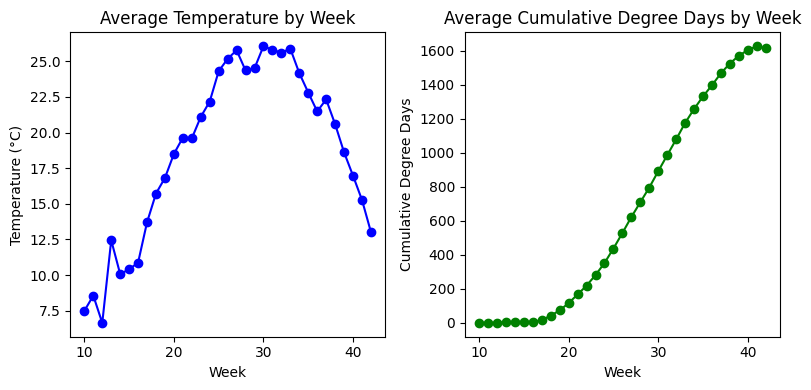

In [34]:
import matplotlib.pyplot as plt
# Calculate weekly averages for temperature and cumulative degree days
weekly_avg_temp = df.groupby('WEEK')['TEMPERATURE_AVG'].mean()
weekly_avg_cum_degree_days = df.groupby('WEEK')['CUM_DEGREE_DAYS'].mean()
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Plot average temperature by week
axes[0].plot(weekly_avg_temp.index, weekly_avg_temp.values, marker='o', color='blue')
axes[0].set_title('Average Temperature by Week')
axes[0].set_xlabel('Week')
axes[0].set_ylabel('Temperature (°C)')
# Plot average cumulative degree days by week
axes[1].plot(weekly_avg_cum_degree_days.index, weekly_avg_cum_degree_days.values, marker='o', color='green')
axes[1].set_title('Average Cumulative Degree Days by Week')
axes[1].set_xlabel('Week')
axes[1].set_ylabel('Cumulative Degree Days')
# Adjust layout and show the plot
plt.tight_layout()

# Let's apply simple models

In [35]:
from sklearn.linear_model import LinearRegression
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
rmse_log_reg = root_mean_squared_error(y_test, y_pred_log_reg)
print("RMSE using Logistic Regression:", round(rmse_log_reg, 2))

RMSE using Logistic Regression: 9.88


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
print("RMSE using Random Forest Regressor:", round(rmse_rf, 2))

RMSE using Random Forest Regressor: 9.57


# Let's do hyper-parameter tuning on RF

In [37]:
from sklearn.model_selection import RandomizedSearchCV
# Define the base model
rf = RandomForestRegressor(random_state=42)
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Use RandomizedSearchCV for rough tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
# Best parameters from Randomized Search
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Best Parameters from Randomized Search:", best_params)
# Make predictions
y_pred_rf = best_model.predict(X_test)
# Compute RMSE
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, 

In [38]:
print("Optimized RMSE using Random Forest Regressor:", round(rmse_rf, 2))

Optimized RMSE using Random Forest Regressor: 9.43


# Let's try more complex models

In [39]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# Define base XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}
# Perform Randomized Search for broad tuning
random_search = RandomizedSearchCV(
    estimator=xgb_regressor, param_distributions=param_dist,
    n_iter=30, cv=5, scoring='neg_root_mean_squared_error',
    verbose=2, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)
# Get best parameters from Randomized Search
best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)
best_xgb = random_search.best_estimator_
# Make predictions
y_pred_xgb = best_xgb.predict(X_test)
# Compute RMSE
rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0

In [40]:
print("Optimized RMSE using XGBoost:", round(rmse_xgb, 2))

Optimized RMSE using XGBoost: 9.46


# Plotting feature importance

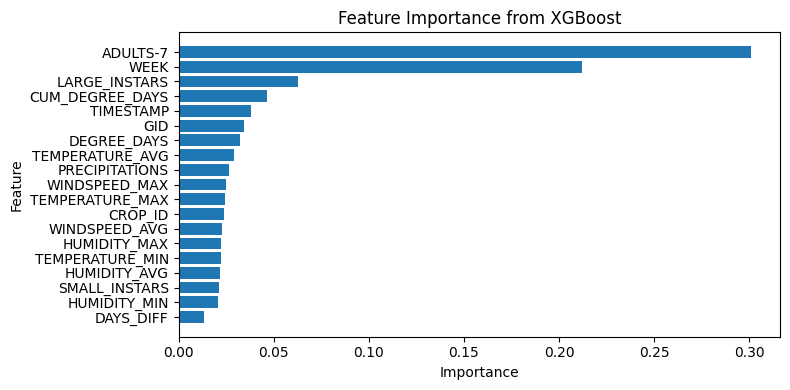

In [41]:
import matplotlib.pyplot as plt
# Get feature importance
feature_importance = best_xgb.feature_importances_
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()

# Let's retry AutoML

In [42]:
automl = AutoML()
automl_settings = {
    "time_budget": 30,  # Time budget in seconds
    "max_iter": 30,  # Max number of iterations
    "metric": 'rmse',  # Evaluation metric
    # "estimator_list": ["xgboost"],
    "task": 'regression',  # Task type
}
automl.fit(X_train, y_train, **automl_settings)
y_pred = automl.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

[flaml.automl.logger: 03-28 17:16:21] {1728} INFO - task = regression
[flaml.automl.logger: 03-28 17:16:21] {1739} INFO - Evaluation method: holdout


[flaml.automl.logger: 03-28 17:16:21] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 03-28 17:16:21] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 03-28 17:16:21] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 03-28 17:16:21] {2393} INFO - Estimated sufficient time budget=2248s. Estimated necessary time budget=16s.
[flaml.automl.logger: 03-28 17:16:21] {2442} INFO -  at 0.3s,	estimator lgbm's best error=13.7019,	best estimator lgbm's best error=13.7019
[flaml.automl.logger: 03-28 17:16:21] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 03-28 17:16:21] {2442} INFO -  at 0.3s,	estimator lgbm's best error=13.7019,	best estimator lgbm's best error=13.7019
[flaml.automl.logger: 03-28 17:16:21] {2258} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 03-28 17:16:22] {2442} INFO -  at 0.4s,	estimator lgbm's best error=11.1891,	

In [43]:
print("RMSE using AutoML:", round(rmse, 2))

RMSE using AutoML: 9.49


# Summary information

In [44]:
automl.best_estimator

'lgbm'

In [45]:
automl.best_config

{'n_estimators': 21,
 'num_leaves': 10,
 'min_child_samples': 4,
 'learning_rate': np.float64(0.24627076501989506),
 'log_max_bin': 7,
 'colsample_bytree': np.float64(0.6833567214124437),
 'reg_alpha': np.float64(0.001224338343645404),
 'reg_lambda': np.float64(0.07369186904789923)}

# References